In [1]:
import torch
import dlc_practical_prologue as prologue

from Functions import get_tests
from Functions import get
from Functions import train_and_test_model as tr

from torch import optim
from torch.nn import functional as F
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Initialization of all the parameters
nb_epochs = 5
mini_batch_size = 100
nb_rounds = 2

# Definition of the train set
train_input, train_target, train_classes,_, _, _ \
    = prologue.generate_pair_sets(1000)

# Definition of the 100 tests sets
Tests = get_tests.get_tests(nb_rounds)
Models = get.conv_ws_al(nb_rounds)

/Users/churchhyll/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/churchhyll/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/churchhyll/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/churchhyll/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


For MLP, after 5 epochs, there is 22.950000762939453 % of test error and a standard deviation equal to 1.6263463497161865
For Conv, after 5 epochs, there is 22.200000762939453 % of test error and a standard deviation equal to 0.8485273122787476


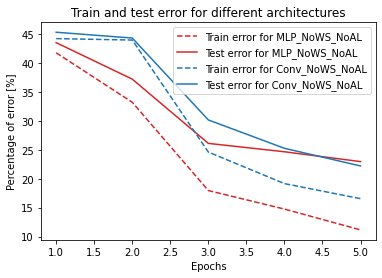

In [3]:
# This part is for the plot with MLP_NoWS_NoAL and Conv_NoWS_NoAL architectures
    
# Train and test error for MLP
MLP = get.mlp_nows_noal(nb_rounds)
Train_error_MLP, Test_error_MLP, std_deviation_mlp = tr.yolo(MLP, train_input, train_target, 
                            train_classes, Tests, nb_epochs, mini_batch_size)

# Train and test error for Conv
Conv = get.conv_nows_noal(nb_rounds)
Train_error_Conv, Test_error_Conv, std_deviation_conv \
    = tr.yolo(Conv, train_input, train_target, 
                            train_classes, Tests, nb_epochs, mini_batch_size)

# Standard deviation of the tests error
print("For MLP, after", nb_epochs, "epochs, there is", Test_error_MLP[-1], 
      "% of test error and a standard deviation equal to", std_deviation_mlp)
print("For Conv, after", nb_epochs, "epochs, there is", Test_error_Conv[-1], 
      "% of test error and a standard deviation equal to", std_deviation_conv)
    
# Plots
epochs = torch.linspace(1, nb_epochs, steps=nb_epochs)
plt.plot(epochs, Train_error_MLP, 'C3--', label='Train error for MLP_NoWS_NoAL')
plt.plot(epochs, Test_error_MLP, 'C3', label='Test error for MLP_NoWS_NoAL')
plt.plot(epochs, Train_error_Conv, 'C0--', label='Train error for Conv_NoWS_NoAL')
plt.plot(epochs, Test_error_Conv, 'C0', label='Test error for Conv_NoWS_NoAL')
plt.xlabel('Epochs')
plt.ylabel('Percentage of error [%]')
plt.title('Train and test error for different architectures')
plt.legend()

plt.savefig('MLP_vs_Conv_NoWS_NoAL.jpg')


# -------------------------------------------------------------------------- #